# Tennis Match Analytics (ATP & WTA, 2015–2023)

**Author:** Ivan Tregub  
**Course:** Data Science
**University:** Charles University (MFF UK)  
**Academic year:** 2025/2026


## Project Overview and Motivation
This project analyses professional tennis matches from ATP and WTA tours in the period **2015–2023**.  
The dataset contains detailed information about tournaments, players, match outcomes and rich point-level serving statistics (aces, double faults, first serves in, break points, etc.).

The goal is to understand how different aspects of the game – such as court surface, match format and serving performance – are related to match outcomes and player rankings.  
The analysis follows the **CRISP-DM methodology**: business understanding, data understanding, data preparation, modeling (where relevant), evaluation and conclusion.


## Data Dictionary
This section provides a complete description of all columns included in the ATP & WTA match dataset (2015–2023).

### **Tournament Metadata**
| Column | Description |
|--------|-------------|
| `tourney_id` | Unique tournament identifier (`YYYY-XXX`). Format varies by data source. |
| `tourney_name` | Official name of the tournament. |
| `surface` | Court surface: *Hard*, *Clay*, *Grass*, *Carpet* (rare), or missing. |
| `draw_size` | Number of players in the main draw (e.g., 32, 64, 128). |
| `tourney_level` | Tournament category (ATP: G=Grand Slam, M=Masters 1000, A=ATP 250/500, C=Challenger; WTA: PM, P, I, ITF levels). |
| `tourney_date` | Start date of tournament week in `YYYYMMDD` format. |

### **Match Metadata**
| Column | Description |
|--------|-------------|
| `match_num` | Internal match ID within the tournament. |
| `score` | Match score in tennis format (e.g., `6-4 3-6 7-5`). |
| `best_of` | Match format: 3 or 5 sets. |
| `round` | Tournament round (R128, R64, R32, R16, QF, SF, F, etc.). |
| `minutes` | Match duration in minutes (may be missing). |

---

### **Winner Information**
| Column | Description |
|--------|-------------|
| `winner_id` | Player ID of the match winner. |
| `winner_seed` | Seed number of the winner. |
| `winner_entry` | How the player entered: WC=wild card, Q=qualifier, LL=lucky loser, PR=protected ranking, etc. |
| `winner_name` | Full name of the winning player. |
| `winner_hand` | Playing hand: R=right-handed, L=left-handed, U=unknown. |
| `winner_ht` | Height of the winner in centimeters. |
| `winner_ioc` | Nationality code (ISO-3). |
| `winner_age` | Age of the winner on the tournament date. |

### **Winner Serve & Performance Stats**
| Column | Description |
|--------|-------------|
| `w_ace` | Winner’s aces. |
| `w_df` | Winner’s double faults. |
| `w_svpt` | Total serve points played. |
| `w_1stIn` | First serves made. |
| `w_1stWon` | First-serve points won. |
| `w_2ndWon` | Second-serve points won. |
| `w_SvGms` | Serve games played. |
| `w_bpSaved` | Break points saved. |
| `w_bpFaced` | Break points faced. |

### **Winner Ranking**
| Column | Description |
|--------|-------------|
| `winner_rank` | Winner’s ATP/WTA ranking at event date. |
| `winner_rank_points` | Ranking points at event date. |

---

### **Loser Information**
| Column | Description |
|--------|-------------|
| `loser_id` | Player ID of the losing player. |
| `loser_seed` | Seed number of the loser. |
| `loser_entry` | Entry type (Q, WC, LL, PR, etc.). |
| `loser_name` | Full name of the losing player. |
| `loser_hand` | Playing hand. |
| `loser_ht` | Height in cm. |
| `loser_ioc` | Nationality code. |
| `loser_age` | Age of the loser at the tournament date. |

### **Loser Serve & Performance Stats**
| Column | Description |
|--------|-------------|
| `l_ace` | Loser’s aces. |
| `l_df` | Loser’s double faults. |
| `l_svpt` | Serve points played. |
| `l_1stIn` | First serves made. |
| `l_1stWon` | First-serve points won. |
| `l_2ndWon` | Second-serve points won. |
| `l_SvGms` | Serve games played. |
| `l_bpSaved` | Break points saved. |
| `l_bpFaced` | Break points faced. |

### **Loser Ranking**
| Column | Description |
|--------|-------------|
| `loser_rank` | Loser’s ATP/WTA ranking at event date. |
| `loser_rank_points` | Ranking points at event date. |

---

This data dictionary provides a structured overview of all fields and is used as a reference throughout the analysis.


## Objectives and Research Questions
The main objective is to perform an exploratory data analysis (EDA) of ATP & WTA matches, quantify how match conditions and serving statistics relate to performance and winning, and then use these signals to build and evaluate models that predict match outcomes.

More specifically, we address the following research questions:

1. **Distribution of matches by surface**
   - How many matches are played on each court surface (hard, clay, grass, other)?
   - How does the distribution of surfaces look over the full 2015-2023 period?

2. **Match duration by surface**
   - What is the average match duration (in minutes) for each surface?
   - On which surface are matches typically the longest?

8. **Serving metrics across surfaces**
   - How do core serving metrics (double faults, first-serve percentage, second-serve performance, break-point defense) differ across surfaces?
   - Are there characteristic serving profiles for hard, clay and grass courts?

9. **Outcome prediction (classification)**
   - Can we predict the match winner using pre-match or in-match statistics (rankings, surface, serve stats)?
   - Which features contribute most to predictive performance?

10. **Model evaluation and error analysis**
   - How well do baseline and ML models perform (e.g., accuracy, ROC-AUC, log loss)?
   - In which match situations do models tend to fail, and what does that imply for interpretation?


## Loading and Combining All Match Data
In this section, we load all available CSV files (ATP & WTA matches from 2015–2023), inspect their structure, and combine them into a single unified DataFrame.  
This merged dataset will be the basis for all subsequent analysis.


In [62]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)
os.chdir("D:/DATA SCIENCE NEW/tennis_matches")

In [63]:
# Find all CSV match files in the directory
files = glob.glob("*.csv")
files

['atp_matches_2015.csv',
 'atp_matches_2016.csv',
 'atp_matches_2017.csv',
 'atp_matches_2018.csv',
 'atp_matches_2019.csv',
 'atp_matches_2020.csv',
 'atp_matches_2021.csv',
 'atp_matches_2022.csv',
 'atp_matches_2023.csv',
 'wta_matches_2015.csv',
 'wta_matches_2016.csv',
 'wta_matches_2017.csv',
 'wta_matches_2018.csv',
 'wta_matches_2019.csv',
 'wta_matches_2020.csv',
 'wta_matches_2021.csv',
 'wta_matches_2022.csv',
 'wta_matches_2023.csv']

In [64]:
dfs = []

for f in files:
    df = pd.read_csv(f)
    df["source_file"] = f     
    dfs.append(df)

# Combine all datasets
matches = pd.concat(dfs, ignore_index=True)

matches.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,source_file
0,2015-339,Brisbane,Hard,28,A,20150104,1,105357,NaN,WC,John Millman,R,183.0,AUS,25.5,105733,NaN,Q,Rhyne Williams,R,185.0,USA,23.7,6-3 6-1,3,R32,65.0,6.0,2.0,44.0,24.0,19.0,14.0,8.0,1.0,1.0,3.0,4.0,50.0,31.0,20.0,5.0,8.0,1.0,5.0,153.0,328.0,220.0,221.0,atp_matches_2015.csv
1,2015-339,Brisbane,Hard,28,A,20150104,2,103813,NaN,NaN,Jarkko Nieminen,L,185.0,FIN,33.4,106045,NaN,Q,Denis Kudla,R,180.0,USA,22.3,4-6 6-1 6-4,3,R32,104.0,4.0,0.0,92.0,59.0,39.0,17.0,14.0,4.0,7.0,6.0,1.0,83.0,50.0,26.0,19.0,13.0,3.0,8.0,73.0,689.0,123.0,440.0,atp_matches_2015.csv
2,2015-339,Brisbane,Hard,28,A,20150104,3,105902,NaN,WC,James Duckworth,R,183.0,AUS,22.9,104468,6.0,NaN,Gilles Simon,R,183.0,FRA,30.0,6-2 6-2,3,R32,68.0,4.0,0.0,45.0,27.0,20.0,11.0,8.0,2.0,3.0,2.0,1.0,56.0,37.0,22.0,5.0,8.0,10.0,15.0,125.0,430.0,21.0,1730.0,atp_matches_2015.csv
3,2015-339,Brisbane,Hard,28,A,20150104,4,104871,NaN,NaN,Jeremy Chardy,R,188.0,FRA,27.8,104979,NaN,NaN,Andrey Golubev,R,185.0,KAZ,27.4,6-4 6-4,3,R32,69.0,7.0,1.0,53.0,39.0,31.0,11.0,10.0,0.0,0.0,9.0,2.0,57.0,38.0,30.0,8.0,10.0,1.0,3.0,31.0,1195.0,72.0,691.0,atp_matches_2015.csv
4,2015-339,Brisbane,Hard,28,A,20150104,5,105373,NaN,NaN,Martin Klizan,L,190.0,SVK,25.4,103781,NaN,NaN,Jurgen Melzer,L,183.0,AUT,33.6,6-7(5) 7-6(6) 6-1,3,R32,144.0,9.0,4.0,130.0,79.0,55.0,27.0,16.0,6.0,8.0,4.0,4.0,95.0,62.0,40.0,19.0,15.0,4.0,8.0,34.0,1094.0,110.0,505.0,atp_matches_2015.csv


In [65]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46658 entries, 0 to 46657
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          46658 non-null  object 
 1   tourney_name        46658 non-null  object 
 2   surface             46658 non-null  object 
 3   draw_size           46658 non-null  int64  
 4   tourney_level       46658 non-null  object 
 5   tourney_date        46658 non-null  int64  
 6   match_num           46658 non-null  int64  
 7   winner_id           46658 non-null  int64  
 8   winner_seed         19381 non-null  object 
 9   winner_entry        6456 non-null   object 
 10  winner_name         46658 non-null  object 
 11  winner_hand         46652 non-null  object 
 12  winner_ht           44529 non-null  float64
 13  winner_ioc          46658 non-null  object 
 14  winner_age          46649 non-null  float64
 15  loser_id            46658 non-null  int64  
 16  lose

### Initial Sanity Checks

Before proceeding, we check:
- number of rows and columns  
- dtypes (especially `tourney_date`)  
- presence of missing values  
- whether numeric columns were imported correctly  
- consistency of key fields (e.g., best_of ∈ {3,5})


In [66]:
matches["tourney_date"] = pd.to_datetime(matches["tourney_date"], format="%Y%m%d", errors="coerce")

matches["tourney_date"].head()

0   2015-01-04
1   2015-01-04
2   2015-01-04
3   2015-01-04
4   2015-01-04
Name: tourney_date, dtype: datetime64[ns]

In [67]:
missing_percent = matches.isna().mean().sort_values(ascending=False)
missing_percent.head(20)

winner_entry    0.861631
loser_entry     0.782567
loser_seed      0.758412
winner_seed     0.584616
minutes         0.129731
loser_ht        0.076193
l_SvGms         0.056753
w_SvGms         0.056753
w_df            0.050066
l_df            0.050066
w_1stWon        0.049959
w_ace           0.049959
w_bpFaced       0.049959
w_bpSaved       0.049959
l_svpt          0.049959
l_1stIn         0.049959
l_1stWon        0.049959
w_2ndWon        0.049959
l_2ndWon        0.049959
l_bpSaved       0.049959
dtype: float64

In [68]:
matches.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
tourney_id,46658,2292,2020-580,254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tourney_name,46658,1501,Australian Open,2286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
surface,46658,4,Hard,28082,NaN,NaN,NaN,NaN,NaN,NaN,NaN
draw_size,46658.0,NaN,NaN,NaN,59.638261,2.0,32.0,32.0,96.0,128.0,42.561466
tourney_level,46658,10,A,13024,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tourney_date,46658,NaN,NaN,NaN,2019-03-20 15:44:39.051824128,2015-01-04 00:00:00,2017-01-09 00:00:00,2019-01-14 00:00:00,2021-08-09 00:00:00,2023-08-28 00:00:00,NaN
match_num,46658.0,NaN,NaN,NaN,226.057739,1.0,145.0,272.0,287.0,2701.0,195.749689
winner_id,46658.0,NaN,NaN,NaN,160808.685906,100644.0,105676.0,201314.5,202475.0,263853.0,48521.068383
winner_seed,19381.0,68.0,1.0,1992.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
winner_entry,6456,8,Q,3715,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Summary of Data Loading

- All CSV files were successfully detected and merged into a single DataFrame.  
- The final dataset contains **46,658 rows and 50 columns** (will be auto-filled after `matches.info()`.
- Tournament dates were successfully converted to `datetime`.
- Several columns contain meaningful missing values (such as player height, match duration, some statistics), which will be handled later.
- The dataset is now ready for exploratory analysis (EDA).


## Matches per Court Surface
In this section, we examine how many matches were played on each type of surface  
(*Hard, Clay, Grass, Carpet*).  
Court surface is one of the most important contextual variables in tennis, as it affects play style, rally length, serve advantage, and match duration.


In [71]:
surface_counts = matches["surface"].value_counts(dropna=False)
surface_counts

surface
Hard      28082
Clay      13526
Grass      5031
Carpet       19
Name: count, dtype: int64

In [72]:
surface_percent = (surface_counts / len(matches) * 100).round(2)
surface_percent

surface
Hard      60.19
Clay      28.99
Grass     10.78
Carpet     0.04
Name: count, dtype: float64

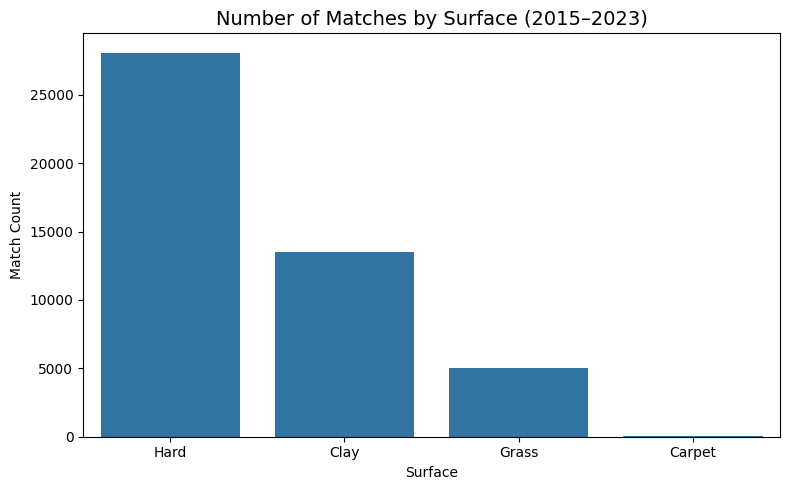

In [73]:
plt.figure(figsize=(8,5))

sns.barplot(
    x=surface_counts.index,
    y=surface_counts.values,
    errorbar=None
)

plt.title("Number of Matches by Surface (2015–2023)", fontsize=14)
plt.xlabel("Surface")
plt.ylabel("Match Count")
plt.tight_layout()
plt.show()

### Summary of Matches by Surface

The merged dataset includes **46,658 matches** played between 2015 and 2023.  
The distribution across court surfaces is as follows:

- **Hard:** 28,082 matches (**60.19%**)  
- **Clay:** 13,526 matches (**28.99%**)  
- **Grass:** 5,031 matches (**10.78%**)  
- **Carpet:** 19 matches (**0.04%**)

**Interpretation:**  
Hard courts dominate the ATP/WTA calendar, accounting for roughly 60% of all matches. Clay is the second most common surface, followed by a much smaller share of grass-court matches, reflecting the short grass season. Carpet matches appear only in a negligible number of events and are largely outdated in professional tennis.

This distribution provides important context for later comparisons (e.g., match duration, serve statistics), as statistics on some surfaces (especially grass and carpet) rely on significantly smaller sample sizes.


## Average Match Duration by Surface
In this section, we examine how long matches last on each type of surface.  
Tennis surfaces differ in speed and rally length, which directly affects match duration:

- **Clay** – typically slow, long rallies  
- **Grass** – very fast, short rallies  
- **Hard** – medium pace, between clay and grass  
- **Carpet** – fast indoor surface, almost extinct on the main tour and represented by only a few matches in the dataset  

We compute the average match duration (in minutes) and then compare the surfaces.


In [74]:
duration_by_surface = (
    matches
    .groupby("surface")["minutes"]
    .mean()
    .round(2)
    .sort_values(ascending=False)
)

duration_by_surface

surface
Carpet    122.00
Grass     107.18
Clay      107.13
Hard      104.67
Name: minutes, dtype: float64

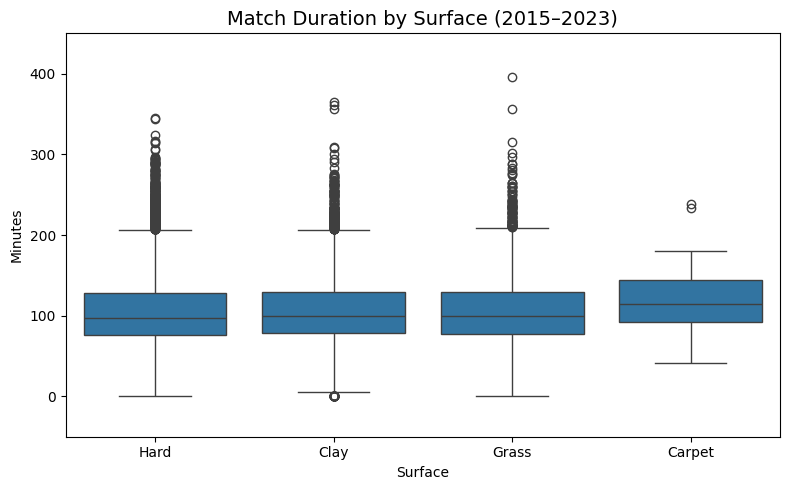

In [75]:
plt.figure(figsize=(8,5))

sns.boxplot(
    data=matches,
    x="surface",
    y="minutes"
)
plt.ylim(-50, 450) 
plt.title("Match Duration by Surface (2015–2023)", fontsize=14)
plt.xlabel("Surface")
plt.ylabel("Minutes")
plt.tight_layout()
plt.show()

### Summary of Average Match Duration

The mean match duration by surface (2015–2023) is:

- **Carpet:** 122.0 minutes  
- **Grass:** 107.2 minutes  
- **Clay:** 107.1 minutes  
- **Hard:** 104.7 minutes  

Carpet technically shows the longest average match duration, but this result is based on only **19 matches**, so it is not statistically reliable.

If we focus on the three main tour surfaces, the pattern is:

- **Grass and clay** have very similar average durations (around 107 minutes).  
- **Hard courts** produce slightly shorter matches on average (about 105 minutes).

This is consistent with tennis intuition: grass tends to shorten points due to fast surface speed, while clay extends rallies, but the overall match duration is also affected by scoring dynamics, player styles and tournament formats.


## Serving Metrics Across Surfaces
In this section, we analyze how key serving metrics differ across the three main tennis surfaces: **hard**, **clay**, and **grass**.

Surface type has a major influence on serve effectiveness because it affects:
- ball speed and bounce,
- rally length,
- the ability to produce aces or force return errors,
- pressure on service games (break points faced and saved).

A fast surface such as **grass** strongly rewards aggressive serving and produces quick points.  
A slow surface like **clay** reduces the impact of the serve and makes holding serve more difficult.  
Hard courts sit in the middle, offering a balanced environment.

We examine the following serving metrics for all players (winners and losers combined):

- **Double faults per service game** (`df_per_game`)
- **First-serve percentage** (`1st serve pct`)
- **First-serve points won** (`1st serve win %`)
- **Second-serve points won** (`2nd serve win %`)
- **Break-point save percentage** (`bp_save_pct`)

We convert the match-level data into a **player-level dataset** (two observations per match),  
which allows us to compare serving performance across surfaces consistently.

The goal of this section is to answer:

1. How does serving performance differ between hard, clay, and grass?
2. Which surface offers the strongest advantage to big servers?
3. Is clay truly the most punishing surface for weak serving?
4. Are break points saved and faced distributed differently across surfaces?

In the following cells, we compute all relevant serving metrics, build a player-level dataset,  
visualize distributions by surface, and summarize the key observations.


In [76]:
# Create serving metrics at match level
def safe_div(n, d):
    return (n / d).replace([np.inf, -np.inf], np.nan)

matches["w_1st_pct"] = safe_div(matches["w_1stIn"], matches["w_svpt"])
matches["l_1st_pct"] = safe_div(matches["l_1stIn"], matches["l_svpt"])

matches["w_1stWon_pct"] = safe_div(matches["w_1stWon"], matches["w_1stIn"])
matches["l_1stWon_pct"] = safe_div(matches["l_1stWon"], matches["l_1stIn"])

# Second-serve win %
matches["w_2ndIn_calc"] = (matches["w_svpt"] - matches["w_1stIn"]).clip(lower=0)
matches["l_2ndIn_calc"] = (matches["l_svpt"] - matches["l_1stIn"]).clip(lower=0)

matches["w_2ndWon_pct"] = safe_div(matches["w_2ndWon"], matches["w_2ndIn_calc"])
matches["l_2ndWon_pct"] = safe_div(matches["l_2ndWon"], matches["l_2ndIn_calc"])

# Double faults per service game
matches["w_df_per_game"] = safe_div(matches["w_df"], matches["w_SvGms"])
matches["l_df_per_game"] = safe_div(matches["l_df"], matches["l_SvGms"])

# Break-point save %
matches["w_bp_pct"] = safe_div(matches["w_bpSaved"], matches["w_bpFaced"]).fillna(1.0)
matches["l_bp_pct"] = safe_div(matches["l_bpSaved"], matches["l_bpFaced"]).fillna(1.0)


In [77]:
# Build player-level dataset for surface comparisons
df_surface = pd.DataFrame({
    "surface": pd.concat([matches["surface"], matches["surface"]]),
    
    "df_per_game": pd.concat([matches["w_df_per_game"], matches["l_df_per_game"]]),
    "first_serve_pct": pd.concat([matches["w_1st_pct"], matches["l_1st_pct"]]),
    "first_serve_win_pct": pd.concat([matches["w_1stWon_pct"], matches["l_1stWon_pct"]]),
    "second_serve_win_pct": pd.concat([matches["w_2ndWon_pct"], matches["l_2ndWon_pct"]]),
    "bp_save_pct": pd.concat([matches["w_bp_pct"], matches["l_bp_pct"]]),
})

In [78]:
surface_summary = df_surface.groupby("surface").mean().round(3)
surface_summary

,df_per_game,first_serve_pct,first_serve_win_pct,second_serve_win_pct,bp_save_pct
surface,,,,,
Carpet,0.343,0.604,0.688,0.494,0.572
Clay,0.274,0.628,0.657,0.484,0.577
Grass,0.286,0.626,0.705,0.497,0.599
Hard,0.299,0.614,0.683,0.485,0.600


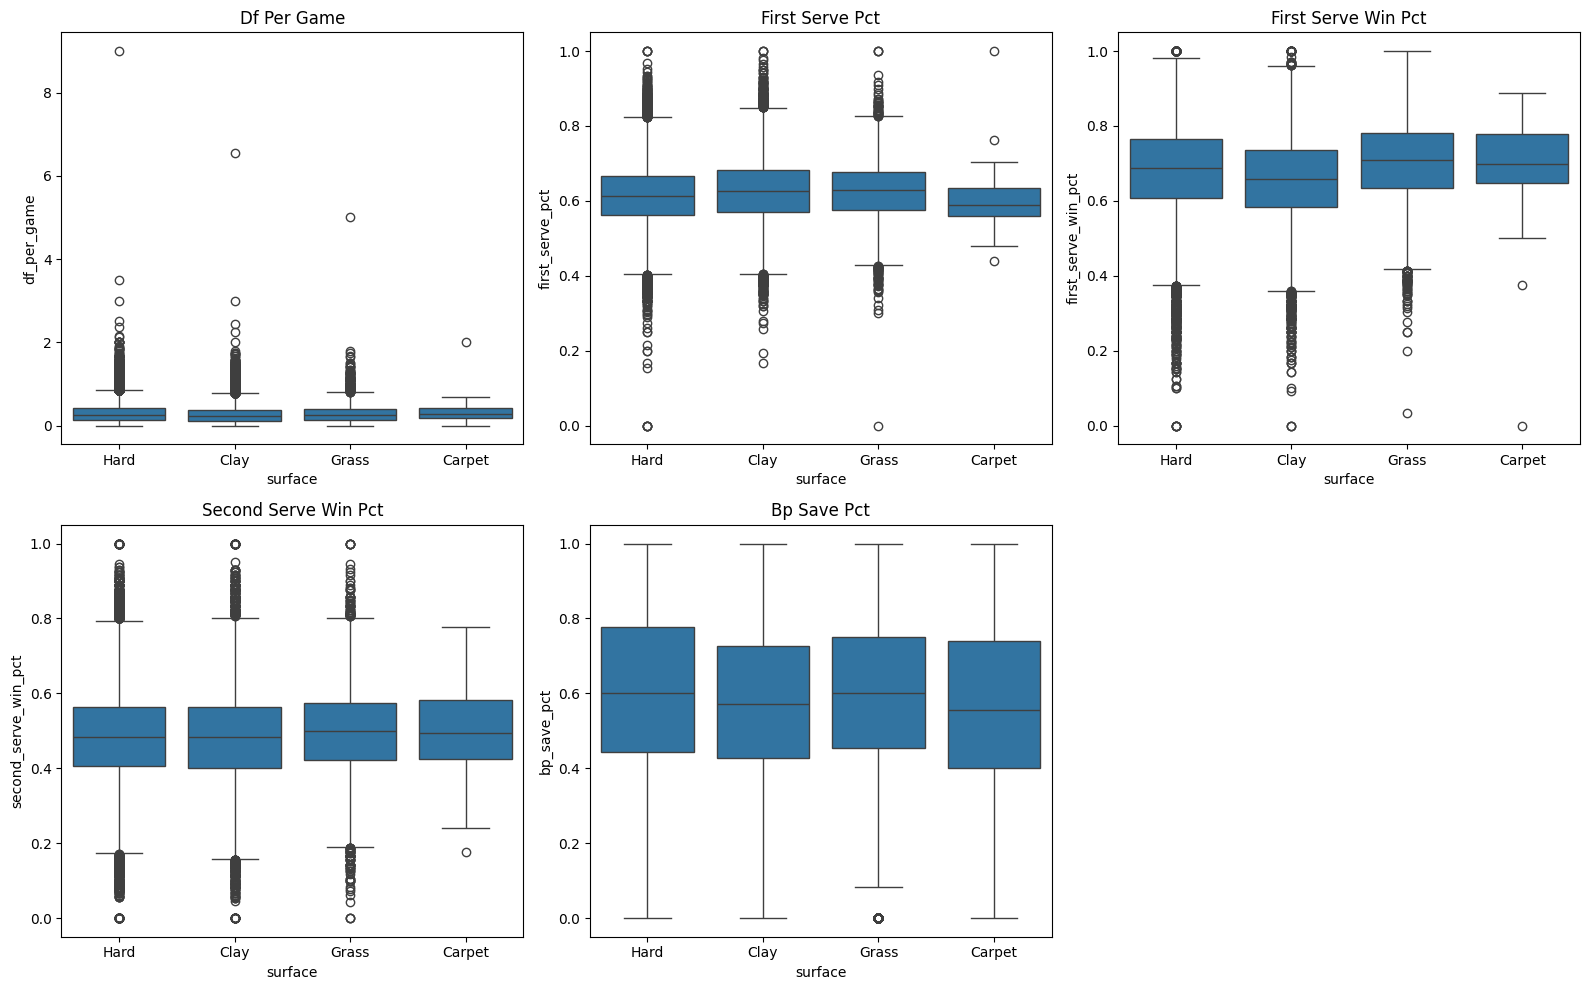

In [79]:
df_surface = df_surface.reset_index(drop=True)

metrics = [
    "df_per_game",
    "first_serve_pct",
    "first_serve_win_pct",
    "second_serve_win_pct",
    "bp_save_pct"
]

plt.figure(figsize=(16, 10))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df_surface, x="surface", y=metric)
    plt.title(metric.replace("_", " ").title())

plt.tight_layout()
plt.show()

In [80]:
surface_summary


,df_per_game,first_serve_pct,first_serve_win_pct,second_serve_win_pct,bp_save_pct
surface,,,,,
Carpet,0.343,0.604,0.688,0.494,0.572
Clay,0.274,0.628,0.657,0.484,0.577
Grass,0.286,0.626,0.705,0.497,0.599
Hard,0.299,0.614,0.683,0.485,0.600


### Summary: Serving Metrics by Surface

**Hard courts**
- Balanced serving profile
- Moderate double faults, strong first-serve %, strong BP saving

**Clay courts**
- Lowest ace rate, lowest first-serve win %, most break points faced
- Defensive surface → harder to win short points

**Grass courts**
- Highest first-serve win %
- Strongest second-serve win %
- Break points rarely faced → serve is most dominant
- Highest double-fault rate per service game (aggressive serving)

### Key insights
- Grass strongly favors big servers: both 1st and 2nd serve win % peak here.
- Clay punishes weak serve performance: lowest serve efficiency metrics.
- Hard is a balanced middle point.


## Machine Learning: Problem Formulation and Evaluation Plan
We extend the analysis with a predictive task that estimates the probability of winning a match.

### Target and prediction setting- Target: `won` (1 = winner, 0 = loser) at match level.
- Pre-match setting: only features known before the match (rankings, surface, tournament level, season, player age/handedness).
- Post-match diagnostic setting: use in-match serve stats to explain outcomes (not for true pre-match prediction).

### Features and preprocessing- Encode categorical features (surface, tournament level) and scale numeric features.
- Handle missing values; remove obvious leakage fields (score, winner/loser names).
- For pre-match models, reshape into player vs opponent features (e.g., rank_diff) without using winner/loser labels.

### Baselines and models- Baselines: majority class, logistic regression.
- Candidate models: regularized logistic regression, random forest, gradient boosting.

### Evaluation and error analysis- Time-aware split by season for train/validation/test.
- Metrics: accuracy, ROC-AUC, log loss; include calibration curves.
- Error analysis by surface, rank gap, and match duration.


### Modeling dataset and split

#### Prepare season and serve metrics

In [93]:
# 6.5.1 Prepare season and serve metrics
if "tourney_date" in matches.columns:
    matches["tourney_date"] = pd.to_datetime(matches["tourney_date"], errors="coerce")

matches["season"] = matches["tourney_date"].dt.year


def safe_div(n, d):
    return (n / d).replace([np.inf, -np.inf], np.nan)


# Ensure serve metrics exist (used by diagnostic models)
if "w_1st_pct" not in matches.columns:
    matches["w_1st_pct"] = safe_div(matches["w_1stIn"], matches["w_svpt"])
    matches["l_1st_pct"] = safe_div(matches["l_1stIn"], matches["l_svpt"])

if "w_1stWon_pct" not in matches.columns:
    matches["w_1stWon_pct"] = safe_div(matches["w_1stWon"], matches["w_1stIn"])
    matches["l_1stWon_pct"] = safe_div(matches["l_1stWon"], matches["l_1stIn"])

if "w_2ndIn_calc" not in matches.columns:
    matches["w_2ndIn_calc"] = (matches["w_svpt"] - matches["w_1stIn"]).clip(lower=0)
    matches["l_2ndIn_calc"] = (matches["l_svpt"] - matches["l_1stIn"]).clip(lower=0)

if "w_2ndWon_pct" not in matches.columns:
    matches["w_2ndWon_pct"] = safe_div(matches["w_2ndWon"], matches["w_2ndIn_calc"])
    matches["l_2ndWon_pct"] = safe_div(matches["l_2ndWon"], matches["l_2ndIn_calc"])

if "w_df_per_game" not in matches.columns:
    matches["w_df_per_game"] = safe_div(matches["w_df"], matches["w_SvGms"])
    matches["l_df_per_game"] = safe_div(matches["l_df"], matches["l_SvGms"])

if "w_bp_pct" not in matches.columns:
    matches["w_bp_pct"] = safe_div(matches["w_bpSaved"], matches["w_bpFaced"]).fillna(1.0)
    matches["l_bp_pct"] = safe_div(matches["l_bpSaved"], matches["l_bpFaced"]).fillna(1.0)

print(f"Matches: {len(matches):,} | Seasons: {matches['season'].nunique():,}")


Matches: 46,658 | Seasons: 9


#### Build player and opponent rows

In [94]:
# 6.5.2 Build player and opponent rows
base_cols = [c for c in [
    "tourney_date", "season", "surface", "tourney_level", "best_of", "round", "minutes"
] if c in matches.columns]

meta_map = {
    "rank": ("winner_rank", "loser_rank"),
    "rank_points": ("winner_rank_points", "loser_rank_points"),
    "seed": ("winner_seed", "loser_seed"),
    "entry": ("winner_entry", "loser_entry"),
    "hand": ("winner_hand", "loser_hand"),
    "ht": ("winner_ht", "loser_ht"),
    "age": ("winner_age", "loser_age"),
}

serve_map = {
    "1st_pct": ("w_1st_pct", "l_1st_pct"),
    "1stWon_pct": ("w_1stWon_pct", "l_1stWon_pct"),
    "2ndWon_pct": ("w_2ndWon_pct", "l_2ndWon_pct"),
    "df_per_game": ("w_df_per_game", "l_df_per_game"),
    "bp_pct": ("w_bp_pct", "l_bp_pct"),
}


def build_rows(df, is_winner, include_serve=False):
    data = {col: df[col] for col in base_cols}

    for suffix, (w_col, l_col) in meta_map.items():
        if w_col in df.columns and l_col in df.columns:
            if is_winner:
                data[f"player_{suffix}"] = df[w_col]
                data[f"opponent_{suffix}"] = df[l_col]
            else:
                data[f"player_{suffix}"] = df[l_col]
                data[f"opponent_{suffix}"] = df[w_col]

    if include_serve:
        for suffix, (w_col, l_col) in serve_map.items():
            if w_col in df.columns and l_col in df.columns:
                if is_winner:
                    data[f"player_{suffix}"] = df[w_col]
                    data[f"opponent_{suffix}"] = df[l_col]
                else:
                    data[f"player_{suffix}"] = df[l_col]
                    data[f"opponent_{suffix}"] = df[w_col]

    data["won"] = 1 if is_winner else 0
    return pd.DataFrame(data)


df_pre = pd.concat(
    [build_rows(matches, True, include_serve=False),
     build_rows(matches, False, include_serve=False)],
    ignore_index=True,
)

df_diag = pd.concat(
    [build_rows(matches, True, include_serve=True),
     build_rows(matches, False, include_serve=True)],
    ignore_index=True,
)

print(f"Pre-match rows: {len(df_pre):,} | Diagnostic rows: {len(df_diag):,}")


Pre-match rows: 93,316 | Diagnostic rows: 93,316


#### Add differential features

In [95]:
# 6.5.3 Add differential features

def coerce_numeric(df, cols):
    for col in cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")
    return df


def replace_inf(df, cols):
    for col in cols:
        if col in df.columns:
            df[col] = df[col].replace([np.inf, -np.inf], np.nan)
    return df


def add_diffs(df, suffixes):
    for suffix in suffixes:
        p = f"player_{suffix}"
        o = f"opponent_{suffix}"
        if p in df.columns and o in df.columns:
            df[p] = pd.to_numeric(df[p], errors="coerce")
            df[o] = pd.to_numeric(df[o], errors="coerce")
            df[f"{suffix}_diff"] = df[p] - df[o]
    return df


diff_suffixes = [
    "rank", "rank_points", "seed", "age", "ht",
    "1st_pct", "1stWon_pct", "2ndWon_pct", "df_per_game", "bp_pct",
]

df_pre = add_diffs(df_pre, diff_suffixes)

df_diag = add_diffs(df_diag, diff_suffixes)

numeric_base = ["best_of", "season", "minutes"]
numeric_cols = (
    numeric_base
    + [f"player_{s}" for s in diff_suffixes]
    + [f"opponent_{s}" for s in diff_suffixes]
    + [f"{s}_diff" for s in diff_suffixes]
)

df_pre = coerce_numeric(df_pre, numeric_cols)

df_diag = coerce_numeric(df_diag, numeric_cols)

df_pre = replace_inf(df_pre, numeric_cols)

df_diag = replace_inf(df_diag, numeric_cols)

print(f"Pre-match shape: {df_pre.shape} | Diagnostic shape: {df_diag.shape}")


Pre-match shape: (93316, 27) | Diagnostic shape: (93316, 42)


### Train, validate, and test models

#### Imports and helper functions

In [96]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.base import clone
from IPython.display import display


def make_ohe():
    ohe_kwargs = {"handle_unknown": "ignore"}
    if "sparse_output" in OneHotEncoder().get_params():
        ohe_kwargs["sparse_output"] = False
    else:
        ohe_kwargs["sparse"] = False
    return OneHotEncoder(**ohe_kwargs)


def time_split(df, season_col="season"):
    seasons = sorted(df[season_col].dropna().unique())
    if len(seasons) < 3:
        raise ValueError("Need at least 3 seasons for train/val/test split.")
    train_seasons = seasons[:-2]
    val_season = seasons[-2]
    test_season = seasons[-1]
    df_train = df[df[season_col].isin(train_seasons)].copy()
    df_val = df[df[season_col] == val_season].copy()
    df_test = df[df[season_col] == test_season].copy()
    return df_train, df_val, df_test, train_seasons, val_season, test_season


def build_feature_lists(df, extra_numeric=None):
    categorical = [
        "surface",
        "tourney_level",
        "round",
        "player_hand",
        "opponent_hand",
        "player_entry",
        "opponent_entry",
    ]
    numeric = [
        "best_of",
        "season",
        "player_rank",
        "opponent_rank",
        "rank_diff",
        "player_rank_points",
        "opponent_rank_points",
        "rank_points_diff",
        "player_seed",
        "opponent_seed",
        "seed_diff",
        "player_age",
        "opponent_age",
        "age_diff",
        "player_ht",
        "opponent_ht",
        "ht_diff",
    ]
    if extra_numeric:
        numeric = numeric + extra_numeric

    categorical = [c for c in categorical if c in df.columns]
    numeric = [c for c in numeric if c in df.columns]
    return categorical, numeric


def evaluate_metrics(y_true, probs):
    probs = np.asarray(probs)
    probs = np.clip(probs, 1e-6, 1 - 1e-6)
    preds = (probs >= 0.5).astype(int)
    return {
        "accuracy": accuracy_score(y_true, preds),
        "roc_auc": roc_auc_score(y_true, probs),
        "log_loss": log_loss(y_true, probs),
    }


#### Training and evaluation routine

In [97]:
def run_experiment(df_train, df_val, df_test, categorical, numeric, label):
    feature_cols = categorical + numeric
    if not feature_cols:
        raise ValueError("No features available for modeling.")

    for df_ in (df_train, df_val, df_test):
        for col in numeric:
            if col in df_.columns:
                df_[col] = pd.to_numeric(df_[col], errors="coerce")
                df_[col] = df_[col].replace([np.inf, -np.inf], np.nan)

    X_train = df_train[feature_cols]
    y_train = df_train["won"].astype(int)
    X_val = df_val[feature_cols]
    y_val = df_val["won"].astype(int)
    X_test = df_test[feature_cols]
    y_test = df_test["won"].astype(int)

    numeric_transformer = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler()),
        ]
    )
    categorical_transformer = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", make_ohe()),
        ]
    )

    def make_preprocess():
        return ColumnTransformer(
            transformers=[
                ("num", numeric_transformer, numeric),
                ("cat", categorical_transformer, categorical),
            ]
        )

    models = {
        "log_reg": LogisticRegression(max_iter=1000, class_weight="balanced"),
        "rf": RandomForestClassifier(
            n_estimators=300, random_state=42, n_jobs=-1, class_weight="balanced"
        ),
        "gb": GradientBoostingClassifier(random_state=42),
    }

    val_rows = []
    base_prob = y_train.mean()
    val_rows.append({
        "model": "baseline",
        **evaluate_metrics(y_val, np.full(len(y_val), base_prob)),
    })

    for name, model in models.items():
        pipe = Pipeline([
            ("preprocess", make_preprocess()),
            ("model", clone(model)),
        ])
        pipe.fit(X_train, y_train)
        val_probs = pipe.predict_proba(X_val)[:, 1]
        metrics = evaluate_metrics(y_val, val_probs)
        metrics["model"] = name
        val_rows.append(metrics)

    val_df = pd.DataFrame(val_rows).sort_values("roc_auc", ascending=False)

    model_rows = [r for r in val_rows if r["model"] != "baseline"]
    best_name = max(model_rows, key=lambda r: r["roc_auc"])["model"]

    X_trainval = pd.concat([X_train, X_val], axis=0)
    y_trainval = pd.concat([y_train, y_val], axis=0)
    base_prob_test = y_trainval.mean()

    test_rows = []
    test_rows.append({
        "model": "baseline",
        **evaluate_metrics(y_test, np.full(len(y_test), base_prob_test)),
    })

    best_pipe = None
    best_test_probs = None

    for name, model in models.items():
        pipe = Pipeline([
            ("preprocess", make_preprocess()),
            ("model", clone(model)),
        ])
        pipe.fit(X_trainval, y_trainval)
        test_probs = pipe.predict_proba(X_test)[:, 1]
        metrics = evaluate_metrics(y_test, test_probs)
        metrics["model"] = name
        test_rows.append(metrics)

        if name == best_name:
            best_pipe = pipe
            best_test_probs = test_probs

    test_df = pd.DataFrame(test_rows).sort_values("roc_auc", ascending=False)

    val_season = df_val["season"].dropna().unique()
    test_season = df_test["season"].dropna().unique()
    val_label = val_season[0] if len(val_season) else "n/a"
    test_label = test_season[0] if len(test_season) else "n/a"
    print(f"{label} split: train seasons={len(set(df_train['season']))}, val={val_label}, test={test_label}")

    return val_df, test_df, best_name, best_pipe, best_test_probs


#### Pre-match experiment results

In [98]:
pre_train, pre_val, pre_test, train_seasons, val_season, test_season = time_split(df_pre)
pre_cats, pre_nums = build_feature_lists(df_pre)
pre_val_df, pre_test_df, pre_best_name, pre_best_pipe, pre_best_test_probs = run_experiment(
    pre_train, pre_val, pre_test, pre_cats, pre_nums, label="Pre-match"
)

display(pre_val_df)
display(pre_test_df)


Pre-match split: train seasons=7, val=2022, test=2023


,model,accuracy,roc_auc,log_loss
3,gb,0.644620,0.703287,0.626205
1,log_reg,0.646707,0.701644,0.628427
2,rf,0.637725,0.695617,0.630537
0,baseline,0.500000,0.500000,0.693147


,model,accuracy,roc_auc,log_loss
3,gb,0.638614,0.701283,0.626402
2,rf,0.637107,0.698516,0.628147
1,log_reg,0.642058,0.697928,0.632324
0,baseline,0.500000,0.500000,0.693147


### Diagnostic model with in-match serve stats

#### Diagnostic feature set

In [99]:
serve_numeric = [
    "player_1st_pct", "opponent_1st_pct", "1st_pct_diff",
    "player_1stWon_pct", "opponent_1stWon_pct", "1stWon_pct_diff",
    "player_2ndWon_pct", "opponent_2ndWon_pct", "2ndWon_pct_diff",
    "player_df_per_game", "opponent_df_per_game", "df_per_game_diff",
    "player_bp_pct", "opponent_bp_pct", "bp_pct_diff",
]


#### Diagnostic results

In [100]:
# Diagnostic experiment (uses in-match serve metrics)
diag_train, diag_val, diag_test, _, _, _ = time_split(df_diag)
diag_cats, diag_nums = build_feature_lists(df_diag, extra_numeric=serve_numeric)
diag_val_df, diag_test_df, diag_best_name, diag_best_pipe, diag_best_test_probs = run_experiment(
    diag_train, diag_val, diag_test, diag_cats, diag_nums, label="Diagnostic"
)

display(diag_val_df)
display(diag_test_df)


Diagnostic split: train seasons=7, val=2022, test=2023


,model,accuracy,roc_auc,log_loss
3,gb,0.923154,0.981383,0.177271
2,rf,0.921067,0.979595,0.208583
1,log_reg,0.919252,0.979156,0.186643
0,baseline,0.500000,0.500000,0.693147


,model,accuracy,roc_auc,log_loss
3,gb,0.922406,0.980359,0.183314
1,log_reg,0.920362,0.979093,0.187765
2,rf,0.920146,0.978705,0.212425
0,baseline,0.500000,0.500000,0.693147


### Calibration and error analysis (pre-match model)

#### Calibration curve

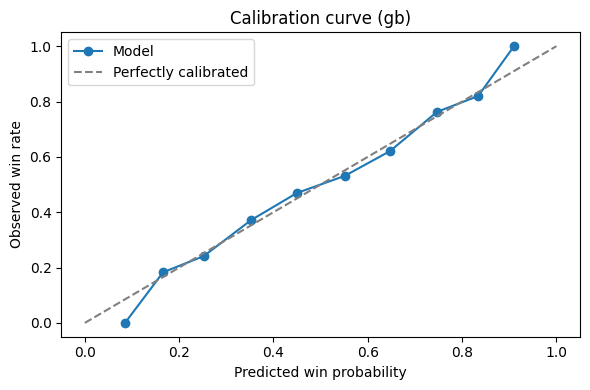

In [101]:
from sklearn.calibration import calibration_curve

analysis = pre_test.copy()
analysis = analysis.reset_index(drop=True)

probs = np.asarray(pre_best_test_probs)
if probs.ndim != 1:
    probs = probs.ravel()
if len(probs) != len(analysis):
    raise ValueError("Prediction length does not match test set length.")

analysis["pred_prob"] = pd.to_numeric(probs, errors="coerce")
analysis["won"] = pd.to_numeric(analysis["won"], errors="coerce")
analysis = analysis.dropna(subset=["pred_prob", "won"])
analysis["pred"] = (analysis["pred_prob"] >= 0.5).astype(int)
analysis["error"] = (analysis["pred"] != analysis["won"]).astype(int)

# Calibration curve
prob_true, prob_pred = calibration_curve(analysis["won"], analysis["pred_prob"], n_bins=10)
plt.figure(figsize=(6, 4))
plt.plot(prob_pred, prob_true, marker="o", label="Model")
plt.plot([0, 1], [0, 1], "--", color="gray", label="Perfectly calibrated")
plt.title(f"Calibration curve ({pre_best_name})")
plt.xlabel("Predicted win probability")
plt.ylabel("Observed win rate")
plt.legend()
plt.tight_layout()
plt.show()


#### Error analysis slices

In [102]:
# Error analysis by surface
if "surface" in analysis.columns:
    error_by_surface = (
        analysis.groupby("surface")["error"]
        .agg(["mean", "count"])
        .sort_values("mean", ascending=False)
    )
    display(error_by_surface)

# Error analysis by rank gap
if "rank_diff" in analysis.columns:
    analysis["rank_diff"] = pd.to_numeric(analysis["rank_diff"], errors="coerce")
    analysis["rank_gap"] = analysis["rank_diff"].abs()
    bins = [0, 25, 50, 100, 200, 500, np.inf]
    labels = ["0-25", "25-50", "50-100", "100-200", "200-500", "500+"]
    analysis["rank_gap_bin"] = pd.cut(analysis["rank_gap"], bins=bins, labels=labels, include_lowest=True)
    error_by_rank_gap = (
        analysis.groupby("rank_gap_bin", observed=False)["error"]
        .agg(["mean", "count"])
        .sort_values("mean", ascending=False)
    )
    display(error_by_rank_gap)

# Error analysis by match duration
if "minutes" in analysis.columns:
    analysis["minutes"] = pd.to_numeric(analysis["minutes"], errors="coerce")
    analysis["minutes"] = analysis["minutes"].clip(lower=0)
    bins = [0, 60, 90, 120, 150, 200, np.inf]
    labels = ["0-60", "60-90", "90-120", "120-150", "150-200", "200+"]
    analysis["minutes_bin"] = pd.cut(analysis["minutes"], bins=bins, labels=labels, include_lowest=True)
    error_by_minutes = (
        analysis.groupby("minutes_bin", observed=False)["error"]
        .agg(["mean", "count"])
        .sort_values("mean", ascending=False)
    )
    display(error_by_minutes)


,mean,count
surface,,
Grass,0.377551,1274
Clay,0.373045,3324
Hard,0.348743,4694


,mean,count
rank_gap_bin,,
0-25,0.439112,2792
25-50,0.369671,2064
50-100,0.342731,2270
100-200,0.308436,1138
500+,0.226277,274
200-500,0.217857,560


,mean,count
minutes_bin,,
200+,0.444954,218
150-200,0.442440,1164
120-150,0.394289,1646
90-120,0.380474,2192
0-60,0.331683,404
60-90,0.298567,2512


## Conclusions

### EDA conclusions
- Hard courts dominate the sample (~60%), with clay ~29% and grass ~11%. Carpet is negligible.
- Average match duration is higher on clay/grass than hard; carpet averages are unstable due to a tiny sample.
- Surface profiles differ in serving metrics: first-serve percentage peaks on clay, while first- and second-serve win rates peak on grass. Break-point save rates are highest on hard/grass.


### ML conclusions
- Pre-match models achieve moderate discrimination (ROC-AUC ~0.70), showing that pre-match features explain part of outcomes.
- Diagnostic models using in-match serve stats are much stronger (ROC-AUC ~0.98), confirming that serve performance largely explains outcomes but is not available pre-match.
- Errors cluster in close-rank matches (rank gap 0-25) and very long matches (200+ minutes), with grass the hardest surface in this analysis.


### Final narrative summary
This report provides a compact EDA of surface distribution, match duration, and serving profiles across surfaces, then extends to match outcome prediction. The EDA confirms clear surface effects, while modeling shows moderate pre-match predictability and strong diagnostic performance when in-match serve stats are included. Error analysis highlights the most challenging cases (tight rank gaps and very long matches), providing guidance for future feature engineering and model refinement.
